## Step 3: Optimize the Model

In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'SPECIAL CONSIDERATIONS'.
application_df = application_df.drop(columns=["EIN"])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Determine the number of unique values in each column.
application_df["NAME"].value_counts()

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
SOUTH ASIAN BAR ASSOCIATION OF WASHINGTON             1
JOY HOUSE MINISTRIES                                  1
ALLIANCE TO STOP SLAVERY AND END TRAFFICKING          1
CHEVRON RETIREES ASSOCIATON                           1
LIFE-LIGHT MINISTRIES INC                             1
Name: NAME, Length: 19568, dtype: int64

In [6]:
# Look at NAME value counts for binning
name_cnt = application_df["NAME"].value_counts()
name_cnt

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
SOUTH ASIAN BAR ASSOCIATION OF WASHINGTON             1
JOY HOUSE MINISTRIES                                  1
ALLIANCE TO STOP SLAVERY AND END TRAFFICKING          1
CHEVRON RETIREES ASSOCIATON                           1
LIFE-LIGHT MINISTRIES INC                             1
Name: NAME, Length: 19568, dtype: int64

In [7]:
# Look at NAME value counts for binning
name_cnt = application_df["NAME"].value_counts()
name_cnt

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `name_to_replace`
name_to_replace = list(name_cnt[name_cnt<5].index)

# Replace in dataframe
for name in name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                  19803
PARENT BOOSTER USA INC                                  1260
TOPS CLUB INC                                            765
UNITED STATES BOWLING CONGRESS INC                       700
WASHINGTON STATE UNIVERSITY                              492
                                                       ...  
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION        5
NATIONAL ORGANIZATION FOR WOMEN INC                        5
INTERNATIONL TRANSPLANT NURSES SOCIETY                     5
KAPPA ALPHA PSI FRATERNITY                                 5
INTERNATIONAL CONGRESS OF CHURCHES AND MINISTRIES          5
Name: NAME, Length: 403, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
apptype_cnt = application_df['APPLICATION_TYPE'].value_counts()
apptype_cnt

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(apptype_cnt[apptype_cnt<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_cnt = application_df['CLASSIFICATION'].value_counts()
class_cnt

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1732        1
C2561        1
C8210        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_cntover1 = class_cnt[class_cnt>1]
class_cntover1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C1256        2
C3200        2
C1246        2
C1267        2
C1234        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_cnt[class_cnt<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df2 = pd.get_dummies(application_df, dtype=float)
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df2['IS_SUCCESSFUL'].values
X = application_df2.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
l1_neuron =  156
l2_neuron = 27
l3_neuron = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=l1_neuron, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=l2_neuron, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=l3_neuron, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 156)               69732     
                                                                 
 dense_1 (Dense)             (None, 27)                4239      
                                                                 
 dense_2 (Dense)             (None, 18)                504       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 74,494
Trainable params: 74,494
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.4669 - accuracy: 0.7819
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.4287 - accuracy: 0.7952
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.4259 - accuracy: 0.7982
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.4237 - accuracy: 0.7985
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4209 - accuracy: 0.8004
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4206 - accuracy: 0.8008
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4194 - accuracy: 0.8014
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4182 - accuracy: 0.8021
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8031
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4169 - accuracy: 0.8025

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4595 - accuracy: 0.7903 - 617ms/epoch - 2ms/step
Loss: 0.45947766304016113, Accuracy: 0.7903206944465637


In [20]:
# # Export our model to HDF5 file
# from google.colab import files
# nn.save('/content/AlphabetSoupCharity_Optimization.h5')
# files.download('/content/AlphabetSoupCharity_Optimization.h5')

## Step 4: Neural Network Model Report

### Overview:
The nonprofit foundation, **Alphabet Soup** needed a tool that can help it select the applicants for funding with the best chance of success in their ventures. Using machine learning and neural networks, an algorithm is developed to predict the applicant's success in their venture using various features.  This algorithm will enable the foundation to assist in deciding whether to select the applicant for funding.

### Results:
**Data Processing**
<br>
In the preprocessing of data, **IS_SUCCESSFUL** variable was identified as the target.  The purpose of the model is to determine the success of the applicant which is dependent on how effectively they use the fund.  The **EIN** variable was dropped as this is neither a target nor feautures.  The remaining variables in the dataset were retained as features.  Binning were done to reduce the noise on our model.  
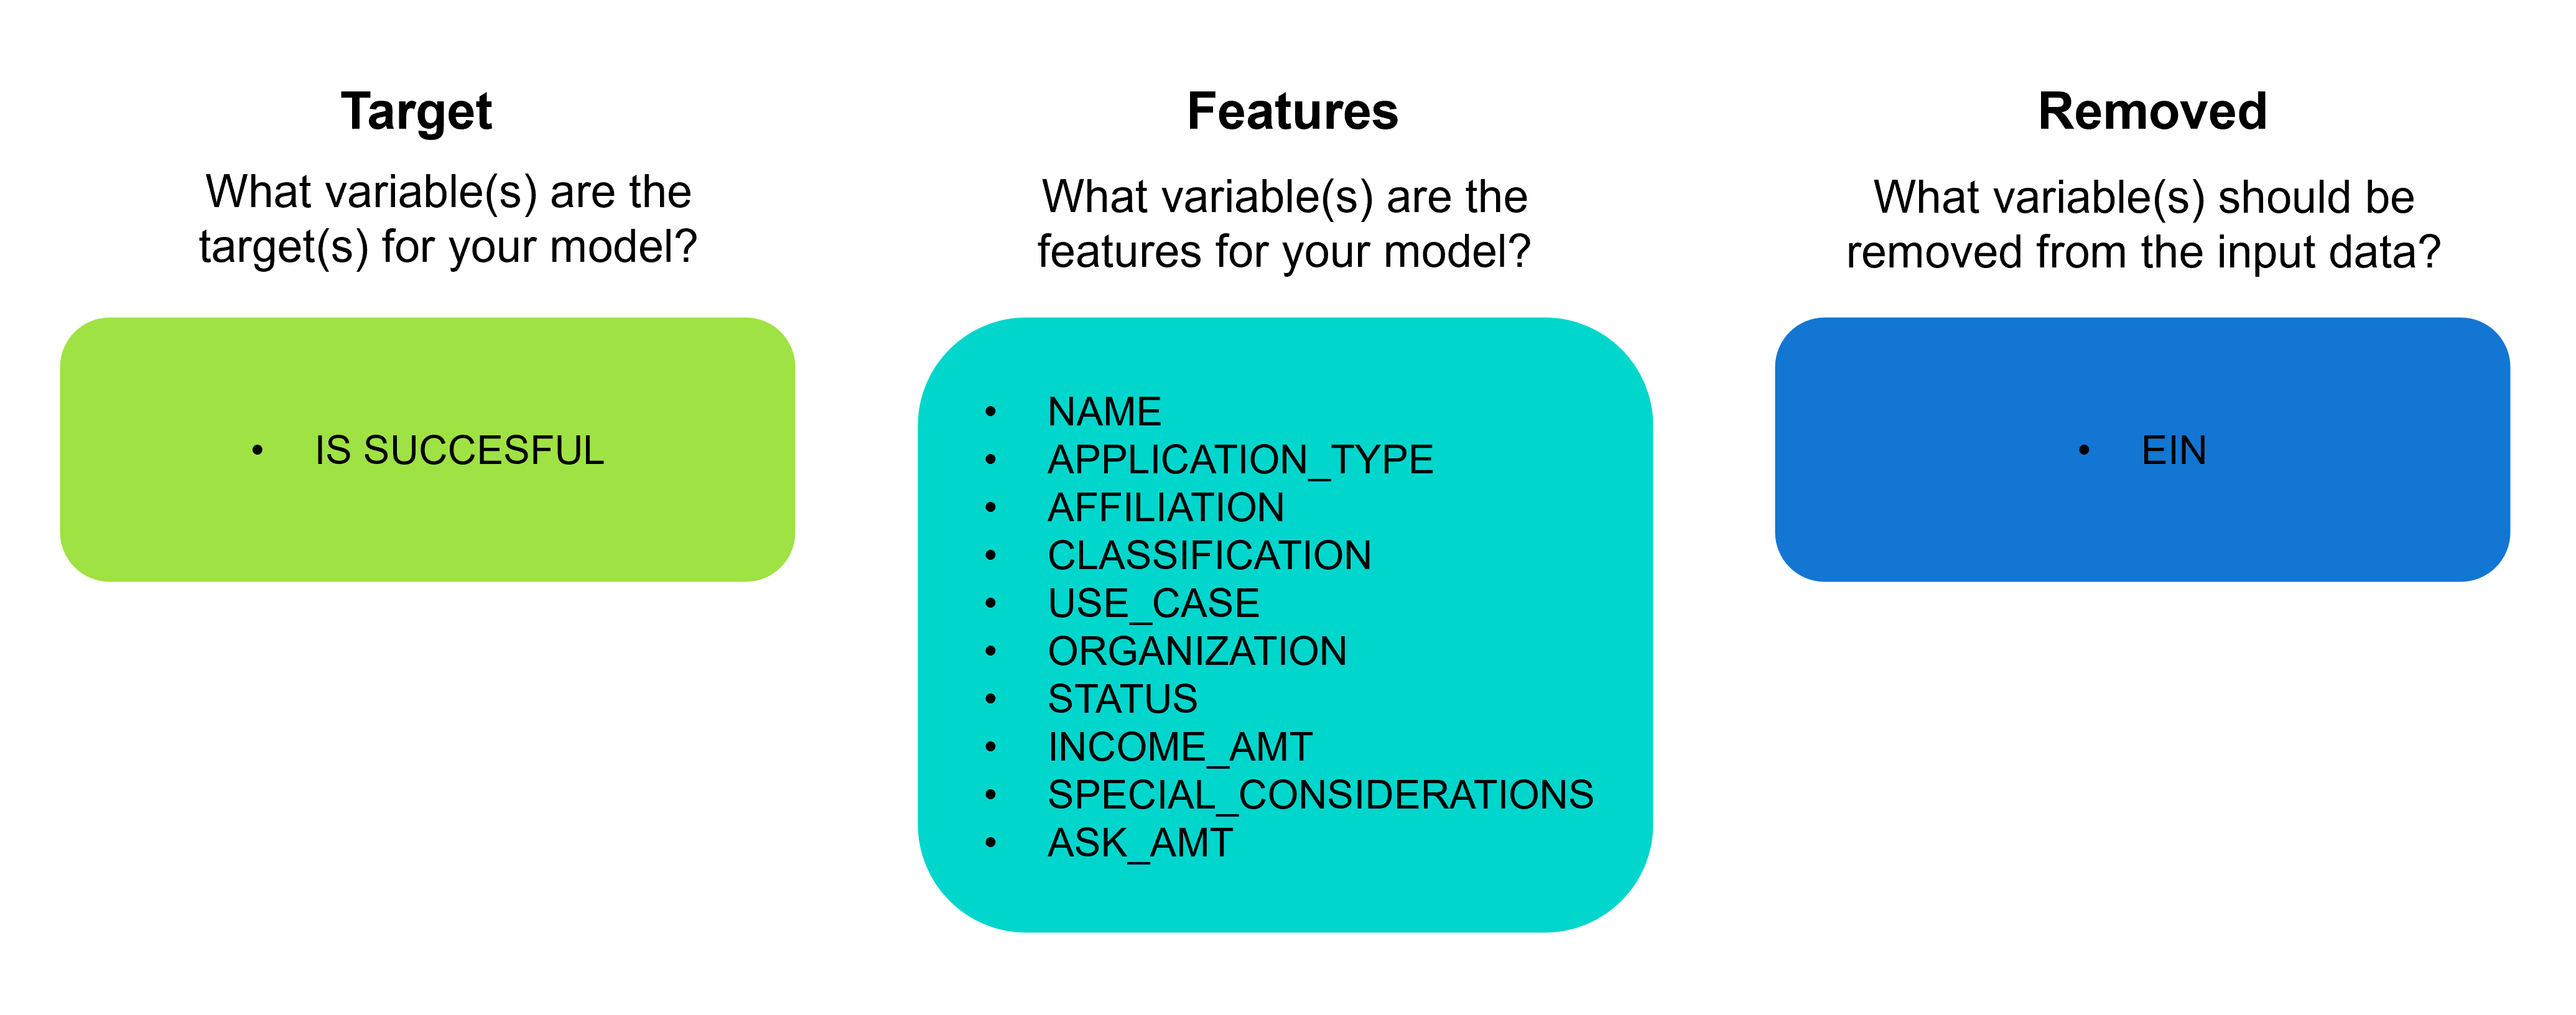
<br>
**Compiling, Training and Evaluating the Model**
<br>
*1) How many neurons, layers and activation function did you select for your neural network model and why?* <br>
For the initial model, I used the default output neuron of 80 and 30 for the first and second layers, respectively.  Two layers were added and the rectified linear activation function or **relu** was used for input so it won't activate all the neurons at the same time, while **sigmoid** was used for output, as this is a *classification problem*.
<br>
<br>
*2) Where you able to address the target model performance?*
Yes
<br>
<br>
*3) What steps did you take in your attemps to increase model performance?* 
* Droped fewer column, the name was retained but the noise was reduced through binning.
* Changed the neuron units to 156 and 27, for first and second layer, respectively
* Added a third hidden layer with neuron units of 18
* Reduced epoch from 100 to 50
<br>


### Summary:
The initial model, **AlphabetSoupCharity.ipynb** only produced an accuracy of **below 75%**.  Despite several attempts to change the neuron units, layers and epochs, those had little impact on increasing the accuracy score.  As a result, I analyzed the dataset and realized that adding back the NAME as a feature is relevant as this determines the number of times the applicant applied for a funding.  However, there is too much noise (variance) on NAME, which had to be reduced through binning.

In order to optimize the model, **AlphabetSoupCharity_Optimization.ipynb**, I needed to reduce the noise caused by the NAME variable by further binning names with count of less than 5 (reducing the uniques from 19568 to 403).  In addition, I added a third layer and changed the unit of neurons to 156, 27 and 18, for the 1st, 2nd and 3rd layers. The epoch was also reduced to 50 from 100. The output layer's activation function was retained to **sigmoid** as the model is supposed classify whether the applications will be successful or not.  These changes enable the model to produce an accuracy rate of **above 75%** or **79%**.